# Importações

In [472]:
import random

random.seed(42)

In [22]:
# GERAL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import re
import math

C:\Users\fabio\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# MODELAGEM
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut

# SCALING
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [183]:
# MODELOS -  SUPERVISIONADO

# REGRESSÃO
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import statsmodels.regression.linear_model as sm

# CLASSIFICAÇÃO
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm
from sklearn.linear_model import SGDClassifier

In [572]:
# MODELOS - NÃO SUPERVISIONADO

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# HDBSCAN
# import hdbscan

# METRICAS DE CLUSTERING
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score
from sklearn.metrics import rand_score,adjusted_rand_score,homogeneity_score,completeness_score
from sklearn.metrics import v_measure_score,adjusted_mutual_info_score


In [483]:
# MÉTRICAS

# CLASSIFICAÇÃO
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix

# REGRESSÃO
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error

# OUTROS
from sklearn.metrics import make_scorer

In [137]:
# DATASETS
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes

In [7]:
# DATASETS -  NÃO SUPERVISIONADO
from sklearn.datasets import make_moons

In [566]:
# EXEMPLO USANDO DATASET DO SKLEARN -  DE REGRESSÃO
load_df = load_boston()
dataset = pd.concat([pd.DataFrame(load_df.data,columns = load_df.feature_names)
                     ,pd.DataFrame(load_df.target,columns = ['target'])], axis=1)

dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [187]:
# EXEMPLO USANDO DATASET DO SKLEARN -  DE CLASSIFICACAO
load_df = load_breast_cancer()
dataset = pd.concat([pd.DataFrame(load_df.data,columns = load_df.feature_names)
                     ,pd.DataFrame(load_df.target,columns = ['target'])], axis=1)
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [243]:
import pandas as pd

# EXEMPLO USANDO DATASET CARREGADO
# Salva e carrega a base
# dataset.to_csv(r'..\Data\Churn_Modelling.csv')
# dataset = pd.read_csv(r'..\Data\Churn_Modelling.csv')
# dataset = pd.read_csv(r'..\Data\Social_Network_Ads.csv')
dataset = pd.read_csv(r'..\Data\Titanic.csv')

# Exploratório Dataset

In [244]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [245]:
# dataset.describe(include='all').T

In [246]:
# dataset.info()

In [247]:
def dataframe_description(df):
    
    isna = df.isna().sum(axis=0).to_frame()
    isna.columns = ['Total de Missing']
    isna['% de Missing'] = round(100*isna['Total de Missing']/df.shape[0],2)

    dtypes = df.dtypes.to_frame()
    dtypes.columns = ['Tipo']

    descriptions = df.describe(include='all').T    
    
    resume = pd.merge(dtypes, isna, left_index=True, right_index=True)
    resume = resume.merge(descriptions, right_index=True, left_index=True)
        
    return resume

dataframe_description(dataset)

,Tipo,Total de Missing,% de Missing,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,int64,0,0.00,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,int64,0,0.00,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,int64,0,0.00,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,object,0,0.00,891,891,"Goodwin, Miss. Lillian Amy",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,object,0,0.00,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,float64,177,19.87,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,int64,0,0.00,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,int64,0,0.00,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,object,0,0.00,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,float64,0,0.00,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [248]:
# # dropa colunas não informativas

# print('dataset shape antes de droppar:{}'.format(dataset.shape))
# print('colunas:{}\n'.format(dataset.columns.values))

# # drop_columns = ['RowNumber','CustomerId','Surname']
# drop_columns = ['PassengerId', 'Name','Ticket','Cabin']

# dataset.drop(columns=drop_columns, inplace=True)

# print('dataset shape após de droppar:{}'.format(dataset.shape))
# print('colunas:{}\n'.format(dataset.columns.values))

In [188]:
# Separa target das variáveis explicativas

target_name= 'target'
# target_name= 'Survived'

X = dataset.drop(columns=target_name)
y = dataset[target_name]

print('X shape:{}'.format(X.shape))
print('y shape:{}'.format(y.shape))

X shape:(569, 30)
y shape:(569,)


In [250]:
numerical = X.select_dtypes(include=np.number).columns.to_list()
categorical = X.select_dtypes(include='object').columns.to_list()

print('Total de colunas identificadas:',len(numerical + categorical))
print('Total de colunas em X:', len(X.columns))
print('Colunas numericas:{}'.format(numerical))
print('Colunas categoricas:{}'.format(categorical))

Total de colunas identificadas: 11
Total de colunas em X: 11
Colunas numericas:['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Colunas categoricas:['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [251]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Separação Treino e Teste

In [252]:
# data_train = pd.read_csv(r'..\Data\Titanic.csv')
# data_test = pd.read_csv(r'..\Data\test.csv')

# target_name= 'Survived'

# X_train = data_train.drop(columns=target_name)
# y_train = data_train[target_name]

# X_test = data_test#.drop(columns=target_name)
# # # y_train = data_test[target_name]


In [189]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,
                                                   y,
                                                   # train_size=0.8
                                                   test_size=0.2,
                                                   shuffle=False,
                                                   stratify=None,
                                                   random_state=42)


print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

X_train shape:(455, 30)
y_train shape:(455,)
X_test shape:(114, 30)
y_test shape:(114,)


# DataPreps Específicos

In [254]:
# Aplica indice
id_col = 'PassengerId'
X_train.set_index(id_col, inplace=True)
X_test.set_index(id_col, inplace=True)

In [255]:
# Dataprep usando Regex
def cria_feature_title(df, main_titles=[]):
    dataset = df.copy()
    dataset['title'] = dataset.Name.apply(lambda x: re.compile('[,](.*)[.]').findall(x)[0])
    if main_titles==[]:
        main_titles = dataset['title'].value_counts()[dataset['title'].value_counts()>5].index.values
    dataset['title'] = dataset.title.apply(lambda x: x if x in main_titles else 'Other')
    print(dataset['title'].value_counts())
    
    return dataset, main_titles

print('\n -- treino')
X_train, main_titles = cria_feature_title(X_train)
print('\n -- teste')
X_test, _ = cria_feature_title(X_test,main_titles)


 -- treino
 Mr        413
 Miss      155
 Mrs        95
 Master     28
Other       21
Name: title, dtype: int64

 -- teste
 Mr        104
 Mrs        29
 Miss       27
 Master     12
Other        7
Name: title, dtype: int64


C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


# Imputers

In [256]:
# numerical_means = X_train[numerical].mean().to_dict() 
# categorical_modes = X_train[categorical].mode().iloc[0,:].to_dict()

In [257]:
# def merge_dicts(*dict_args):
#     """
#     Given any number of dictionaries, shallow copy and merge into a new dict,
#     precedence goes to key-value pairs in latter dictionaries.
#     """
#     result = {}
#     for dictionary in dict_args:
#         result.update(dictionary)
#     return result

# fill_values =merge_dicts(numerical_means, categorical_modes)

In [258]:
def droppa_colunas(dataset, drop_columns):
    
    # dropa colunas não informativas

    print('dataset shape antes de droppar:{}'.format(dataset.shape))
    print('colunas:{}\n'.format(dataset.columns.values))

    dataset.drop(columns=drop_columns, inplace=True)

    print('dataset shape após de droppar:{}'.format(dataset.shape))
    print('colunas:{}\n'.format(dataset.columns.values))
    
    return dataset

# drop_columns = ['RowNumber','CustomerId','Surname']
drop_columns = ['Name','Ticket','Cabin'] #'PassengerId' 
X_train = droppa_colunas(X_train, drop_columns)
X_test = droppa_colunas(X_test, drop_columns)

dataset shape antes de droppar:(712, 11)
colunas:['Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Cabin'
 'Embarked' 'title']

dataset shape após de droppar:(712, 8)
colunas:['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'title']

dataset shape antes de droppar:(179, 11)
colunas:['Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Cabin'
 'Embarked' 'title']

dataset shape após de droppar:(179, 8)
colunas:['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'title']



In [561]:
def split_by_type(X):
    numerical = X.select_dtypes(include=np.number).columns.to_list()
    categorical = X.select_dtypes(include='object').columns.to_list()

    print('Total de colunas identificadas:',len(numerical + categorical))
    print('Total de colunas em X:', len(X.columns))
    print('Colunas numericas:{}'.format(numerical))
    print('Colunas categoricas:{}'.format(categorical))
    
    return numerical, categorical

numerical, categorical = split_by_type(X_train)

Total de colunas identificadas: 13
Total de colunas em X: 13
Colunas numericas:['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Colunas categoricas:[]


In [260]:
def fillna_dataframe(X_train, X_test):

    ordered_columns = X_train.columns
    
    print(ordered_columns)
    
    train_means = X_train[numerical].mean().to_dict()
    train_modes = X_test[categorical].mode().iloc[0,:].to_dict()
    
    # Média para continuas e moda para categoricas
    train = pd.concat([X_train.loc[:,numerical].fillna(train_means), 
               X_train.loc[:,categorical].fillna(train_modes)],axis=1)

    test = pd.concat([X_test.loc[:,numerical].fillna(train_means),
                      X_test.loc[:,categorical].fillna(train_modes)], axis=1)
    
    
    print(train.columns)
    print(test.columns)
    
    return train[ordered_columns],test[ordered_columns]

In [261]:
X_train, X_test = fillna_dataframe(X_train, X_test)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'title'], dtype='object')
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'title'], dtype='object')
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'title'], dtype='object')


In [262]:
dataframe_description(X_train)

,Tipo,Total de Missing,% de Missing,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Pclass,int64,0,0.0,712.0,NaN,NaN,NaN,2.301966,0.838656,1.0,2.0,3.0,3.0,3.0
Sex,object,0,0.0,712,2,male,456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,float64,0,0.0,712.0,NaN,NaN,NaN,30.030531,13.005767,0.75,22.0,30.030531,36.0,80.0
SibSp,int64,0,0.0,712.0,NaN,NaN,NaN,0.52809,1.064342,0.0,0.0,0.0,1.0,8.0
Parch,int64,0,0.0,712.0,NaN,NaN,NaN,0.382022,0.813122,0.0,0.0,0.0,0.0,6.0
Fare,float64,0,0.0,712.0,NaN,NaN,NaN,32.509538,48.67271,0.0,7.925,15.0229,31.275,512.3292
Embarked,object,0,0.0,712,3,S,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,object,0,0.0,712,5,Mr,413,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
dataframe_description(X_test)

,Tipo,Total de Missing,% de Missing,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Pclass,int64,0,0.0,179.0,NaN,NaN,NaN,2.335196,0.827506,1.0,2.0,3.0,3.0,3.0
Sex,object,0,0.0,179,2,male,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,float64,0,0.0,179.0,NaN,NaN,NaN,28.708581,12.972878,0.42,21.0,30.030531,33.5,74.0
SibSp,int64,0,0.0,179.0,NaN,NaN,NaN,0.502793,1.246903,0.0,0.0,0.0,1.0,8.0
Parch,int64,0,0.0,179.0,NaN,NaN,NaN,0.379888,0.77954,0.0,0.0,0.0,0.0,5.0
Fare,float64,0,0.0,179.0,NaN,NaN,NaN,30.98971,53.688977,0.0,7.8958,13.0,30.0,512.3292
Embarked,object,0,0.0,179,3,S,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,object,0,0.0,179,5,Mr,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
# # Remove os NA de treino e Teste

# X_train.dropna(inplace=True)
# y_train = y_train[y_train.index.isin(X_train.index)]
# X_test.dropna(inplace=True)
# y_test = y_test[y_test.index.isin(X_test.index)]

# print('X_train shape:{}'.format(X_train.shape))
# print('y_train shape:{}'.format(y_train.shape))
# print('X_test shape:{}'.format(X_test.shape))
# print('y_test shape:{}'.format(y_test.shape))

In [265]:
# # Imputers

# def fill_values(df, colunas, fill='mean'):
    
#     df_filled = df.copy()
    
#     if fill =='mean':
#         df_filled[colunas] = df_filled[colunas].fillna(df_filled[colunas].mean())
        
#     if fill =='median':
#         df_filled[colunas] = df_filled[colunas].fillna(df_filled[colunas].median()) 
        
#     else:
#         df_filled[colunas] = df_filled[colunas].fillna(fill)
        
#     return df_filled

# Encodings

In [266]:
# Encondings

X_train = pd.get_dummies(X_train,columns=categorical,drop_first=False)
X_test = pd.get_dummies(X_test,columns=categorical,drop_first=False)

print('X_train shape:{}'.format(X_train.shape))
print('X_test shape:{}'.format(X_test.shape))

# Crio colunas zeradas casa exista alguma categoria não present no teste
for coluna in X_train.columns:
    if coluna not in X_test.columns:
        X_test[coluna]=0
        
# Drop first
for coluna in categorical:
    X_train.drop(columns = X_train.filter(like=coluna).columns[0])
    X_test.drop(columns = X_train.filter(like=coluna).columns[0])

X_train shape:(712, 15)
X_test shape:(179, 15)


# Scaler / Normalizer

In [242]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Feature Scaling
# min max
scaler= MinMaxScaler()

# normalizer
# scaler =StandardScaler()

# Scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
colunas = X_train.columns

#Transforma os valores
X_train = pd.DataFrame(X_train_scaled ,columns= colunas)
X_test = pd.DataFrame(X_test_scaled ,columns= colunas)

# # Descrição do dataframe
# X_train.describe().T


In [180]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# # Feature Scaling
# min max
# scaler= MinMaxScaler()

# normalizer
# scaler =StandardScaler()

# # Scaler
# X_train_scaled=scaler.fit_transform(X_train[numerical])
# X_test_scaled=scaler.transform(X_test[numerical])

# X_train = pd.concat([X_train.drop(columns=numerical), pd.DataFrame(X_train_scaled,columns= numerical)], axis=1)
# X_test = pd.concat([X_test.drop(columns=numerical), pd.DataFrame(X_test_scaled,columns= numerical)], axis=1)

# # Descrição do dataframe
# X_train.describe().T

In [565]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.307441,0.149023,-1.101739,-0.307979,0.054812,0.330897,0.026622,-0.038653,-0.891228,-0.433141,-1.229441,0.418324,-0.935438
1,-0.304061,-0.562998,-0.372590,-0.307979,-0.548570,0.120231,0.498744,0.363923,-0.737292,-0.844127,-0.102026,0.418324,-0.325014
2,-0.304064,-0.562998,-0.372590,-0.307979,-0.548570,1.165350,-0.114670,0.363923,-0.737292,-0.844127,-0.102026,0.317748,-1.074837
3,-0.303247,-0.562998,-1.121653,-0.307979,-0.644762,0.909542,-0.641930,0.866557,-0.583356,-0.996345,0.303844,0.362229,-1.234780
4,-0.297341,-0.562998,-1.121653,-0.307979,-0.644762,1.113368,-0.352454,0.866557,-0.583356,-0.996345,0.303844,0.418324,-0.884080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1.288098,-0.562998,1.317014,-0.307979,1.410237,-0.658136,0.460837,-1.227240,2.649297,2.382878,0.980293,-1.033236,2.731506
400,3.723942,-0.562998,1.317014,-0.307979,1.410237,-0.473462,1.225881,-1.186666,2.649297,2.382878,0.980293,0.418324,2.261950
401,1.983558,-0.562998,1.317014,-0.307979,1.410237,0.013531,1.225881,-1.193413,2.649297,2.382878,0.980293,0.418324,1.315499
402,1.236443,-0.562998,1.317014,-0.307979,1.410237,0.096976,1.225881,-1.163625,2.649297,2.382878,0.980293,-0.095430,1.314032


In [567]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# # scaler coluna por coluna

# normalização
scaler=MinMaxScaler()

#padronização
# scaler=StandardScaler()

# cria dicionarios de scaling
valores_scaling={}

# troca coluna por coluna (para colunas numéricas)
for coluna in numerical:
    X_train[coluna] = scaler.fit_transform(X_train[[coluna]]).ravel()
    X_test[coluna] = scaler.transform(X_test[[coluna]]).ravel()
    valores_scaling[coluna] = scaler


C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

# Classifiers

# Metricas

In [215]:
# metricas gerais - todas num dicionário v.1

from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import roc_auc_score, plot_roc_curve

def classification_metrics(y_true, y_pred):

    metrics={}
    
    metrics['accuracy']=accuracy_score(y_true, y_pred)
    metrics['precision']=precision_score(y_true, y_pred)
    metrics['recall']=recall_score(y_true, y_pred) 
    metrics['f1']=f1_score(y_true, y_pred)
    metrics['log_loss'] = log_loss(y_true, y_pred)
#     metrics['roc_auc']=np.nan

    return metrics

In [216]:
# metricas gerais - todas num dicionário v.2

from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import roc_auc_score, plot_roc_curve

def classification_metrics(y_true, y_pred, proba=True, threshold=0.5):

    metrics={}
    
    if proba == True:
        metrics['accuracy']=accuracy_score(y_true, y_pred > threshold)
        metrics['precision']=precision_score(y_true, y_pred > threshold)
        metrics['recall']=recall_score(y_true, y_pred > threshold) 
        metrics['f1']=f1_score(y_true, y_pred > threshold)
        metrics['log_loss'] = log_loss(y_true, y_pred > threshold)
        metrics['roc_auc']=roc_auc_score(y_true, y_pred)
    
    else:
        metrics['accuracy']=accuracy_score(y_true, y_pred > threshold)
        metrics['precision']=precision_score(y_true, y_pred > threshold)
        metrics['recall']=recall_score(y_true, y_pred > threshold) 
        metrics['f1']=f1_score(y_true, y_pred > threshold)
        metrics['log_loss'] = log_loss(y_true, y_pred > threshold)
        metrics['roc_auc']=np.nan
    
    return metrics

# Modelos

In [152]:
# sklearn.neighbors.VALID_METRICS['brute']

In [217]:
from sklearn.neighbors import KNeighborsClassifier

classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# n_neighbors:int, default=5 == número de vizinhos
# weights (default=’uniform’)== peso utilizado na classificação podendo ser ‘uniform’ - mesmo peso, ‘distance’ - inverso da distância or callable= distância definida pelo usuário
# algorithm (default=’auto’) == algoritmo usado para computar vizinho mais próximos, podendo ser ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’,
# leaf_size: int (default=30)== aplicavel quando se utiliza BallTree ou KDTree 
# p (default=2 / euclidiana)== parametro da distância de Minkowski [int] / p = 1 - manhattan_distance (l1), p = 2 - euclidean_distance (l2)  
# metric: str or callable (default=’minkowski’)== métrica utilizada de distância // possíveis métricas:sklearn.neighbors.VALID_METRICS['brute']
# metric_params (default=None)== parametro adicional de metric [dict] 
# n_jobs:int (default=None)== numero de jobs paralelos realizado na procura pelos vizinhos. Não afeta o fit

# Fit do modelo
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T

,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.945055,0.938849,0.970260,0.954296,1.897765,0.992765
test,0.938596,0.987952,0.931818,0.959064,2.120809,0.962850


In [269]:
from sklearn.linear_model import LogisticRegression

classifier= LogisticRegression(penalty='l2',C=0.1, max_iter=1e4)

# penalty: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’ == tipo de regularização
# dual: bool, default=False == método de otimização (preferir dual =False se n_samples>n_features)
# tol: float, default=1e-4 == tolerancia (criterio de stop/convergencia)
# C: float, default=1.0 == parametro de regularização (inverso da regularização:1/lambda)
# fit_intercept: bool, default=True == específica se tenho o termo de intercepto (bias)
# intercept_scaling: float, default=1 **
# class_weight: dict or ‘balanced’, default=None == peso das classes
# random_state: int, RandomState instance, default=None
# solver:{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’ == método de otimização
# max_iter:int, default=100 == número máximo de iterações até convergência
# multi_class:{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’ == como tratar a multiclass
# verbose:int, default=0 == verbose do fit
# warm_start:bool, default=False 
# n_jobs:int, default=None
# l1_ratio: float, default=None == se penalty é 'elasticnet' controla balance entre l1 e l2. se =0: penalty l2, se =1: l1

# Fit do modelo
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# Atributos do modelo
coefs_ = pd.DataFrame({'variavel':X_train.columns,'coef':classifier.coef_[0]}).set_index('variavel')
intercept = pd.DataFrame({'variavel': ['intercept'] , 'coef': classifier.intercept_}).set_index('variavel')
coefs_ = coefs_.append(intercept)

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T

,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.814607,0.787402,0.719424,0.75188,6.403317,0.863276
test,0.860335,0.819672,0.781250,0.80000,4.823901,0.903397


In [270]:
from sklearn.tree import DecisionTreeClassifier

classifier= DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10)

# criterion: {“gini”, “entropy”}, default=”gini” == critério de split
# splitter: {“best”, “random”}, default=”best” == estratégia de split
# max_depth: int, default=None == máxima profundidade da árvore
# min_samples_split: int or float, default=2 == minima qtde. de samples para split de nó interno (inteiro ou percentual)
# min_samples_leaf: int or float, default=1 == minima qtde. de samples nos nó pós split (esquerda/direita) (inteiro/percentual)
# min_weight_fraction_leaf: float, default=0.0 == **revisar
# max_features: int,float or {“auto”, “sqrt”, “log2”}, default=None == máximo número de features avaliados para split (combate overfitting)
# random_state:int, RandomState instance or None, default=None
# max_leaf_nodes:int, default=None == número máximo de folhas
# min_impurity_decrease:float, default=0.0 == quantidade mínima da redução de impureza
# min_impurity_split:float, default=0 == mínima impureza para que seja possível fazer splitt
# class_weight:dict, list of dict or “balanced”, default=None == peso das classes
# ccp_alpha: non-negative float, default=0.0 == parâmetro de cost complexity prunning

classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# from sklearn import tree

# # Arvores - principais atributos
# print('profundidade:{}'.format(classifier.get_depth()))
# print('num. folhas:{}'.format(classifier.get_n_leaves()))
# print('parametros:{}'.format(classifier.get_params()))
# profundidade dado numero de registro : math.log(n,2)

# plt.figure(figsize=(20,15))
# tree.plot_tree(classifier,filled=True,feature_names=X_train.columns)
# plt.show()

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T

,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.839888,0.822835,0.751799,0.785714,5.530136,0.873127
test,0.849162,0.793651,0.781250,0.787402,5.209818,0.887568


In [271]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# classifier = MultinomialNB()
classifier = BernoulliNB(alpha=0.5)

### GAUSSIAN ###
# priors:array-like of shape (n_classes,) == as priors de cada classe. se não especificado é ajustado conforme os dados
# var_smoothing:float, default=1e-9 == porção da máxima variancia de todos os features que é adicionado  à variância para estabilidade

### MULTINOMIAL ###
# Contagens 
# alpha: float, default=1.0 == suavizador de Laplace
# binarize: float or None, default=0.0 == transforma em binários - threshold para acima de 0 como default
# class_prior: array-like of shape (n_classes,), default=None ==  priors de cada classe

### BERNOULLI ###
# Booleanas
# alpha: float, default=1.0 == suavizador de Laplace
# binarize: float or None, default=0.0 == transforma em binários - threshold para acima de 0 como default
# fit_prior: bool, default=True == verdadeiro ou falso / aprendizado da prior
# class_prior: array-like of shape (n_classes,), default=None ==  priors de cada classe

categorical = [coluna for coluna in X_train.columns if coluna not in numerical]
ref_cols = categorical
# ref_cols = numerical

# Fit do modelo
classifier.fit(X_train[ref_cols], y_train)
y_pred_train = classifier.predict(X_train[ref_cols])
y_pred_test = classifier.predict(X_test[ref_cols])

y_pred_proba_train = classifier.predict_proba(X_train[ref_cols])[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test[ref_cols])[:,-1]

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T

,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.783708,0.742188,0.683453,0.711610,7.470540,0.807235
test,0.798883,0.741379,0.671875,0.704918,6.946413,0.843342


In [249]:
from sklearn.svm import SVC, LinearSVC

classifier= SVC(C=1, random_state=42,probability=True)

# C:float, default=1.0 == parametro de regularização (inverso)
# kernel:{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’ == tipo de kernel
# degree:int, default=3 == grau da função polinimonial do kernel
# gamma:{‘scale’, ‘auto’} or float, default=’scale’ == somente em 'rbf', 'poly' ou 'sigmoid'
# coef0:float, default=0.0 == termo independe do kernel - somente em 'poly' ou 'sigmoid'
# probability:bool, default=False == se verdadeiro, utiliza Platt scaling = que é aplicar uma regressão logística no score do svm
# tol:float, default=1e-3 == tolerancia (criterio de parada)
# class_weight:dict or ‘balanced’, default=None == peso das classes
# decision_function_shape:{‘ovo’, ‘ovr’}, default=’ovr’ == usado em multiclasse para estrategia ovo ou ovr
# break_ties:bool, default=False
# random_state:int, RandomState instance or None, default=None

# Fit do modelo
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T

# Obtem os valores da distância do hiperplano
# classifier.decision_function(X_train)
# classifier.decision_function(X_test)

,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.978022,0.981413,0.981413,0.981413,0.759103,0.996942
test,0.964912,1.000000,0.954545,0.976744,1.211887,0.999126


In [150]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100,
                                    max_depth=8,
                                    min_samples_leaf=8,
                                    class_weight={0:1, 1:2},
                                    random_state=42)

# n_estimators: int, default=100 == número de árvores
# criterion: {“gini”, “entropy”}, default=”gini” == critério de split
# max_depth: int, default=None == máxima profundidade da árvore
# min_samples_split: int or float, default=2 == minima qtde. de samples para split de nó interno (inteiro ou percentual)
# min_samples_leaf: int or float, default=1 == minima qtde. de samples nos nó pós split (esquerda/direita) (inteiro/percentual)
# min_weight_fraction_leaf: float, default=0.0 == **revisar
# max_features: int,float or {“auto”, “sqrt”, “log2”}, default=None == máximo número de features avaliados para split (combate overfitting)
# max_leaf_nodes:int, default=None == número máximo de folhas
# min_impurity_decrease:float, default=0.0 == quantidade mínima da redução de impureza
# min_impurity_split:float, default=0 == mínima impureza para que seja possível fazer splitt
# random_state:int, RandomState instance or None, default=None
# bootstrap:bool, default=True == se usa técnica de boostrap
# oob_score: bool, default=False == score out of bag (daí pode obter os score oob pelo atributo oob_score_)
# class_weight:dict, list of dict or “balanced”, default=None == peso das classes
# ccp_alpha: non-negative float, default=0.0 == parâmetro de cost complexity prunning
# max_samples:int or float, default=None == se uso bootstrap, qual o tamanho do dataset criado por reposição. Se float pega o percentual

# Fit do modelo
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T

,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.971429,0.957143,0.996283,0.976321,0.986843,0.996902
test,0.964912,0.977273,0.977273,0.977273,1.211901,0.996941


In [274]:
from sklearn.ensemble import GradientBoostingClassifier

classifier= GradientBoostingClassifier(n_estimators=1000,
                                       max_depth=8,
                                       min_samples_leaf=0.05,
                                       random_state=42
                                      )

# loss{‘deviance’, ‘exponential’}, default=’deviance’ == função de custo, expontential usa os odds - como em regressão logística
# learning_rate: float, default=0.1 == multiplicador do output de cada árvore
# n_estimators: int, default=100 == número de árvores
# subsample:float, default=1.0 == não são todos os registros que são usados nos fitt dos estimadores - aumenta viés
# criterion{‘friedman_mse’, ‘mse’, ‘mae’}, default=’friedman_mse’== critério de split
# max_depth: int, default=None == máxima profundidade da árvore
# min_samples_split: int or float, default=2 == minima qtde. de samples para split de nó interno (inteiro ou percentual)
# min_samples_leaf: int or float, default=1 == minima qtde. de samples nos nó pós split (esquerda/direita) (inteiro/percentual)
# min_weight_fraction_leaf: float, default=0.0 == **revisar
# max_features: int,float or {“auto”, “sqrt”, “log2”}, default=None == máximo número de features avaliados para split (combate overfitting)
# max_leaf_nodes:int, default=None == número máximo de folhas
# min_impurity_decrease:float, default=0.0 == quantidade mínima da redução de impureza
# min_impurity_split:float, default=0 == mínima impureza para que seja possível fazer split
# init: estimator or ‘zero’, default=None == computa a predição original
# random_state:int, RandomState instance or None, default=None
# bootstrap:bool, default=True == se usa técnica de boostrap
# validation_fraction: float, default=0.1 ******
# ccp_alpha: non-negative float, default=0.0 == parâmetro de cost complexity prunning
# max_samples:int or float, default=None == se uso bootstrap, qual o tamanho do dataset criado por reposição. Se float pega o percentual

# Fit do modelo
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T

,accuracy,f1,log_loss,precision,recall,roc_auc
train,0.980337,0.974638,0.679139,0.981752,0.967626,0.998587


In [248]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=500, learning_rate=0.9, random_state=42)

# base_estimator:object, default=None == estimador base (se não definido usa stump)
# n_estimators:int, default=50 == número de estimadores
# learning_rate:float, default=1. == diminui a contribuição de cada estimador
# algorithm:{‘SAMME’, ‘SAMME.R’}, default=’SAMME.R’
# random_state:int, RandomState instance or None, default=None

# Fit do modelo
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T

,accuracy,precision,recall,f1,log_loss,roc_auc
train,1.000000,1.000000,1.000000,1.000000,9.992007e-16,1.000000
test,0.938596,0.976471,0.943182,0.959538,2.120816e+00,0.993444


In [247]:
from xgboost import XGBClassifier

classifier = XGBClassifier(n_estimators=100, 
                           max_depth=10,
                           objective = 'binary:logistic',
                           learning_rate=0.05,
                           gamma= 0.5,
                           alpha=0.2)

# classifier = XGBClassifier(params)

# n_estimators (int) – Número de arvores/estimadores
# max_depth (Optional[int]) – Profundidade máxima (pre-prunning)
# learning_rate (Optional[float]) – Boosting learning rate (xgb’s “eta”)
# verbosity (Optional[int]) – Grau de verbosidade
# objective (typing.Union[str, typing.Callable[[numpy.ndarray, numpy.ndarray], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).
# booster (Optional[str]) – Tipo de booster: gbtree, gblinear or dart.
# gamma (Optional[float]) - Mínima redução de loss para se ter uma quebra
# min_child_weight (Optional[float]) - soma mínima dos pesos para se criar um child node
# subsample (Optional[float]) – subsample do dataset de treino entre as arvores consecutivas
# reg_alpha - regularização l1(quanto maior, menor a similiridade das folhas)
# reg_lambda - regularização l2
# random_state 

# Fit do modelo
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T


,accuracy,precision,recall,f1,log_loss,roc_auc
train,1.000000,1.000000,1.000000,1.000000,9.992007e-16,1.000000
test,0.973684,0.988506,0.977273,0.982857,9.089222e-01,0.999126


In [246]:
from sklearn.linear_model import SGDClassifier

# define o SGDClassifier
classifier = SGDClassifier(loss='log',penalty='l2', alpha=1e-6, 
                           learning_rate='constant', eta0= 0.1, tol=1e-3, 
                           average=False, random_state=42)


# Fit do modelo
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T

# Número de iterações
# classifier.n_iter_

,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.975824,0.974265,0.985130,0.979667,0.835016,0.996183
test,0.982456,1.000000,0.977273,0.988506,0.605943,0.999126


In [245]:
from sklearn.linear_model import Perceptron

classifier = Perceptron(tol=1e-3, random_state=0)

# penalty:{‘l2’,’l1’,’elasticnet’}, default=None == regularização (tipo)
# alpha:float, default=0.0001 == coeficiente de regularização
# l1_ratio:float, default=0.15 == se elastic-net, qual ratio
# fit_intercept:bool, default=True == se o intercepto deve ser estimado
# max_iter:int, default=1000 == máximo de iterações
# tol:float, default=1e-3 == critério de parada
# class_weight:dict, {class_label: weight} or “balanced”, default=None

# Fit do modelo
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

# y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
# y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T

,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.591209,0.591209,1.0,0.743094,14.119475,0.252228
test,0.771930,0.771930,1.0,0.871287,7.877447,0.385927


,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.591209,0.591209,1.0,0.743094,14.119475,0.252228
test,0.771930,0.771930,1.0,0.871287,7.877447,0.385927


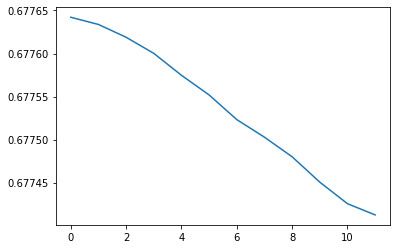

In [244]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(random_state=1, activation= 'logistic', solver='sgd',
                           hidden_layer_sizes= (100,3), max_iter=1000).fit(X_train, y_train)

# Fit do modelo
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)

# plotta a loss curve
plt.plot(classifier.loss_curve_)

# Métricas
pd.DataFrame.from_dict(metrics).T

In [277]:
# pd.DataFrame({id_col: X_test.index, target_name :y_pred_test}).to_csv('titanic_test.csv', index=False)

# Cross Validation

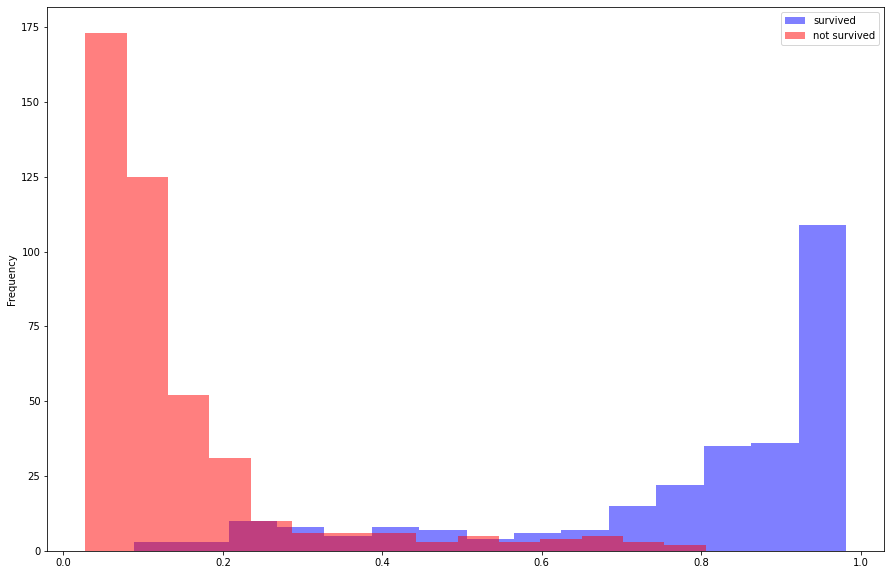

In [278]:
# Histograma

scores = pd.DataFrame({'true':y_train, 'score': y_pred_proba_train})
fig,axes = plt.subplots(1,1, figsize=(15,10))
scores.query('true==1')['score'].plot(kind='hist', bins=15, color='blue', ax=axes, alpha=0.5, label='survived')
scores.query('true==0')['score'].plot(kind='hist', bins=15, color='red', ax=axes, alpha= 0.5, label ='not survived')
plt.legend()

In [218]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import roc_auc_score, plot_roc_curve

# acurácia
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Acurácia:\ntreino:{:.5f} teste:{:.5f}'.format(accuracy_train,accuracy_test))

# precisão
precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
print('Precisão:\ntreino:{:.5f} teste:{:.5f}'.format(precision_train,precision_test))

# recall
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
print('Recall:\ntreino:{:.5f} teste:{:.5f}'.format(recall_train,recall_test))

# f1
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
print('f1:\ntreino:{:.5f} teste:{:.5f}'.format(f1_train,f1_test))

# log loss
log_loss_train = log_loss(y_train, y_pred_train)
log_loss_test = log_loss(y_test, y_pred_test)
print('Log Loss:\ntreino:{:.5f} teste:{:.5f}'.format(log_loss_train,log_loss_test))

# roc auc
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
print('ROC AUC:\ntreino:{:.5f} teste:{:.5f}'.format(roc_auc_train,roc_auc_test))

Acurácia:
treino:0.94505 teste:0.93860
Precisão:
treino:0.93885 teste:0.98795
Recall:
treino:0.97026 teste:0.93182
f1:
treino:0.95430 teste:0.95906
Log Loss:
treino:1.89776 teste:2.12081
ROC AUC:
treino:0.99276 teste:0.96285


In [37]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [39]:
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut

# Define o cv
kfold = KFold(n_splits= 10, shuffle=False) #, random_state=42)
# kfold = LeaveOneOut()
# kfold = StratifiedKFold(n_splits= 10, shuffle=True, random_state=42)

# Scores de classificação
scoring = ['accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 
           'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss']

# Usando cross val score
results = cross_val_score(classifier, X, y, scoring='neg_log_loss',  cv=kfold) # cv=5

# printa resultados
print('resultados:{}'.format(results))

# printa média dos resultados
print('media:{}'.format(results.mean()))

# plot scores
# sns.distplot(results, bins=5)

resultados:[nan nan nan nan nan nan nan nan nan nan]
media:nan


C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\fabio\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fabio\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 331, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "C:\Users\fabio\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 605, in _validate_y_class_weight
    y_original)
  File "C:\Users\fabio\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\fabio\Anaconda\lib\site-packages\sklearn\utils\class_weight.py", line 167, in compute_sample_weight
    y=y_full)
  File "C:\Users\fabio\A

In [525]:
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# Define o cv
kfold = KFold(n_splits= 10, shuffle=False) #, random_state=42)
# kfold = LeaveOneOut()
# kfold = StratifiedKFold(n_splits= 10, shuffle=True, random_state=42)

# Cria métrica == como funciona : recebe modelo, e X e y_true (que pode ser train ou test)
logloss_score = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Classificador
print(classifier)

results = cross_validate(estimator = classifier,
                         X=X,
                         y=y, 
#                          cv=10,
                         cv = kfold,
                         scoring={'roc_auc':'roc_auc','acuracia':'accuracy','log_loss':logloss_score}, 
                         return_train_score=True)

pd.DataFrame(results)

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=8,
                       min_samples_leaf=8, random_state=42)


,fit_time,score_time,test_roc_auc,train_roc_auc,test_acuracia,train_acuracia,test_log_loss,train_log_loss
0,0.133180,0.364035,0.816964,0.903267,0.750000,0.828125,-0.502724,-0.413804
1,0.100445,0.015619,0.798701,0.906328,0.736111,0.835938,-0.506455,-0.422096
2,0.119069,0.019838,0.824916,0.904704,0.746479,0.823713,-0.514989,-0.418341
3,0.100367,0.030667,0.827441,0.901885,0.760563,0.833073,-0.462663,-0.420688
4,0.153980,0.025887,0.901993,0.898813,0.802817,0.822153,-0.424066,-0.428648
5,0.132740,0.020989,0.897010,0.901396,0.873239,0.828393,-0.416408,-0.424307
6,0.128348,0.023963,0.921927,0.898706,0.845070,0.836193,-0.423672,-0.425223
7,0.109869,0.015585,0.807309,0.904082,0.774648,0.826833,-0.511786,-0.417688
8,0.109350,0.015622,0.927741,0.893775,0.887324,0.820593,-0.391453,-0.435865
9,0.114716,0.021941,0.779900,0.906900,0.704225,0.840874,-0.595991,-0.409707


In [526]:
pd.DataFrame(results).agg(['mean','max', 'min']).T.sort_index()

,mean,max,min
fit_time,0.120206,0.153980,0.100367
score_time,0.055415,0.364035,0.015585
test_acuracia,0.788048,0.887324,0.704225
test_log_loss,-0.475021,-0.391453,-0.595991
test_roc_auc,0.850390,0.927741,0.779900
train_acuracia,0.829589,0.840874,0.820593
train_log_loss,-0.421637,-0.409707,-0.435865
train_roc_auc,0.901986,0.906900,0.893775


In [294]:
# Usando cross_val_predict
from sklearn.model_selection import cross_val_score,cross_validate, cross_val_predict

# Retorna o predict para cada sample, quando o mesmo se encontrava no conjunto de teste
k_predictions = cross_val_predict(classifier, X, y, cv=10)

print('Performance media no conjunto de treino: {:.2f} %'.format(100*(k_predictions == y_train).mean()))

Performance media no conjunto de treino: 78.79 %


In [527]:
from sklearn.metrics import make_scorer

# Faz o scorer - principais scores
accuracy_scorer = make_scorer(accuracy_score, needs_proba=False,greater_is_better=False)
precision_scorer = make_scorer(precision_score, needs_proba=False,greater_is_better=False)
recall_scorer = make_scorer(recall_score, needs_proba=False,greater_is_better=False)
f1_scorer = make_scorer(f1_score, needs_proba=False,greater_is_better=False)
log_loss = make_scorer(log_loss, needs_proba=False,greater_is_better=False)
auc_scorer = make_scorer(roc_auc_score, needs_proba=True,greater_is_better=True)

In [68]:
from sklearn.model_selection import cross_val_score,cross_validate, cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.metrics import make_scorer

# Define o cv
kfold = KFold(n_splits= 10, shuffle=True, random_state=42)
# kfold = LeaveOneOut()
# kfold = StratifiedKFold(n_splits= 10, shuffle=True, random_state

# Shapes
print('Full Dataset:')
print('X shape:{}'.format(X.shape))
print('y shape:{}'.format(y.shape))
print('\n')

cv_scores={}
cv_scores['train']={}
cv_scores['test']={}

# enumerate splits
for i,(train, val) in enumerate(kfold.split(X,y)):
    print('fold:{}'.format(i))
    
    print('X shape:{}'.format(X.iloc[train].shape))
    print('y shape:{}'.format(y.iloc[train].shape))

    print('X_validation shape:{}'.format(X.iloc[val].shape))
    print('y_validation shape:{}'.format(y.iloc[val].shape))
    
    # Classificador
    classifier.fit(X.iloc[train], y.iloc[train])
    
    # predição de probs
    y_pred_proba_train = classifier.predict_proba(X.iloc[train])[:,-1]
    y_pred_proba_test = classifier.predict_proba(X.iloc[val])[:,-1]
    
    # predictions das classes
    y_pred_train = classifier.predict(X.iloc[train])
    y_pred_test = classifier.predict(X.iloc[val])
    
#     # predictions com threshold
#     y_pred_train = (y_pred_proba_train>0.2).astype(int)
#     y_pred_test = (y_pred_proba_test>0.2).astype(int)

    # precisao
    precision_train =precision_score(y.iloc[train], y_pred_train)
    precision_test =precision_score(y.iloc[val], y_pred_test)
    print(precision_train,precision_test)
    
    # recall
    recall_train =recall_score(y.iloc[train], y_pred_train)
    recall_test =recall_score(y.iloc[val], y_pred_test)
    print(recall_train,recall_test)

    # f1
    f1_train =f1_score(y.iloc[train], y_pred_train)
    f1_test =f1_score(y.iloc[val], y_pred_test)
    print(f1_train,f1_test)

    cv_scores['train'][i]={}
    cv_scores['test'][i]={}
    
    cv_scores['train'][i]['precision']=precision_train
    cv_scores['train'][i]['recall']=recall_train
    cv_scores['train'][i]['f1']=f1_train
    
    cv_scores['test'][i]['precision']=precision_test
    cv_scores['test'][i]['recall']=recall_test
    cv_scores['test'][i]['f1']=f1_test
    
    print('\n')

Full Dataset:
X shape:(150, 10)
y shape:(150, 1)


fold:0
X shape:(135, 10)
y shape:(135, 1)
X_validation shape:(15, 10)
y_validation shape:(15, 1)


C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ValueError: Class label 0 not present.

# Regressors

In [160]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.DataFrame(diabetes.target, columns=['target'])

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,
                                                   y,
                                                   # train_size=0.8
                                                   test_size=0.2,
                                                   shuffle=False,
                                                   stratify=None,
                                                   random_state=42)

print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

X_train shape:(353, 10)
y_train shape:(353, 1)
X_test shape:(89, 10)
y_test shape:(89, 1)


# Metricas

In [211]:
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error,mean_squared_log_error

# Variância explicada
explained_variance_train=explained_variance_score(y_train, y_pred_train)
explained_variance_train=explained_variance_score(y_test, y_pred_test)

# Erro médio logaritmo
mslogerror_train=mean_squared_log_error(y_train, y_pred_train)
mslogerror_test=mean_squared_log_error(y_test, y_pred_test)

# Erro absoluto médio
mae_train=mean_absolute_error(y_train, y_pred_train)
mae_test=mean_absolute_error(y_test, y_pred_test)

# Erro quádratico médio
mse_train=mean_squared_error(y_train, y_pred_train)
mse_test=mean_squared_error(y_test, y_pred_test)

# RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Erro Mediano Absoluto
median_abs_error_train=median_absolute_error(y_train, y_pred_train)
median_abs_error_test=median_absolute_error(y_test, y_pred_test)

# R quadrado
r2_train=r2_score(y_train, y_pred_train)
r2_test=r2_score(y_test, y_pred_test)

In [20]:
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error,mean_squared_log_error

def regression_metrics(y_true, y_pred):
    
    metrics={}
    metrics['explained_variance']=explained_variance_score(y_true, y_pred)
    metrics['mslogerror']=mean_squared_log_error(y_true, y_pred)
    metrics['mae']=mean_absolute_error(y_true, y_pred) 
    metrics['mse']=mean_squared_error(y_true, y_pred)
    metrics['rmse'] = np.sqrt(metrics['mse'])
    metrics['median_abs_error']=median_absolute_error(y_true, y_pred)
    metrics['r2']=r2_score(y_true, y_pred)
    
    return metrics

In [569]:
import statsmodels.regression.linear_model as sm

reg_OLS=sm.OLS(endog=np.array(y_train), exog=np.array(X_train)).fit()

reg_OLS.summary(xname=X_train.columns.to_list())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              714.4
Date:                Sun, 29 Aug 2021   Prob (F-statistic):                   4.25e-263
Time:                        22:21:55   Log-Likelihood:                         -1239.5
No. Observations:                 404   AIC:                                      2505.
Df Residuals:                     391   BIC:                                      2557.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM         -21.3526      5.183     -4.119      0.000     -31.543     -11.162
ZN             4.4474      1.552      2.865      0.004       1.396       7.499
INDUS          3.4890      1.795      1.944      0.053      -0.039       7.017
CHAS           1.8601      0.979      1.900      0.058      -0.064       3.784
NOX           -0.4225      2.277     -0.186      0.853      -4.898       4.053
RM            35.8936      2.382     15.068      0.000      31.210      40.577
AGE            1.7245      1.519      1.135      0.257      -1.262       4.711
DIS           -5.3354      2.294     -2.326      0.021      -9.846      -0.825
RAD            8.1276      2.179      3.729      0.000       3.843      12.412
TAX           -6.0690      2.336     -2.598      0.010     -10.663      -1.475
PTRATIO       -4.6579      1.398     -3.331      0.001      -7.407      -1.909
B             11.2070      1.794      6.247      0.000       7.680      14.734
LSTAT        -15.0990      2.298     -6.572      0.000     -19.616     -10.582
==============================================================================
Omnibus:                      139.197   Durbin-Watson:                   1.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1027.447
Skew:                           1.261   Prob(JB):                    7.81e-224
Kurtosis:                      10.395   Cond. No.                         32.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [570]:
def backwardElimination(x,y, sl):    
    numVars = len(x.columns.to_list())
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y.values, x.values).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    print("the variable {} has SL value of {:.4f} which is bigger than 0.05\n".format(x.columns[j],maxVar))
                    x = x.drop(columns= x.columns[j])
    print(regressor_OLS.summary(xname=x.columns.to_list()))
    return x
 
SL = 0.05
X_opt = X_train
y = y_train
X_Modeled = backwardElimination(X_opt,y,  SL)

the variable NOX has SL value of 0.8528 which is bigger than 0.05

the variable AGE has SL value of 0.2558 which is bigger than 0.05

the variable CHAS has SL value of 0.0512 which is bigger than 0.05

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              923.2
Date:                Sun, 29 Aug 2021   Prob (F-statistic):                   2.09e-266
Time:                        22:22:03   Log-Likelihood:                         -1242.2
No. Observations:                 404   AIC:                                      2504.
Df Residuals:                     394   BIC:                                      2544.
Df Model:                          10                                                  
Covari

In [162]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

regressor = LinearRegression()
# regressor = Lasso(alpha=1)
# regressor = Ridge(alpha=1)
# regressor = ElasticNet(alpha =1, l1_ratio=0.5)
# para ElasticNet ==> l1_ratio:float, default=0.5

# alpha:float, default=1.0 - parametro de regularização
# fit_intercept:bool, default=True == se considerado termo de bias
# normalize:bool, default=False == usado somente caso fit_intercept é nulo
# n_jobs:int, default=None
# positive:bool, default=False == força os coeficientes serem positivos

# Fit do modelo
regressor.fit(X_train, y_train)
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Performance
metrics={}
metrics['train'] = regression_metrics(y_train, y_pred_train)
metrics['test'] = regression_metrics(y_test, y_pred_test)
pd.DataFrame.from_dict(metrics).T

,explained_variance,mslogerror,mae,mse,rmse,median_abs_error,r2
train,0.508893,0.169522,43.478739,2850.255066,53.38778,38.533480,0.508893
test,0.543781,0.173095,42.548193,2929.886973,54.12843,34.697311,0.543757


In [165]:
from sklearn.neighbors import KNeighborsRegressor

regressor= KNeighborsRegressor(n_neighbors=3, weights='distance', metric='minkowski', p=1)

# n_neighbors:int, default=5 == número de vizinhos
# weights (default=’uniform’)== peso utilizado na classificação podendo ser ‘uniform’ - mesmo peso, ‘distance’ - inverso da distância or callable= distância definida pelo usuário
# algorithm (default=’auto’) == algoritmo usado para computar vizinho mais próximos, podendo ser ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’,
# leaf_size: int (default=30)== aplicavel quando se utiliza BallTree ou KDTree 
# p (default=2 / euclidiana)== parametro da distância de Minkowski [int] / p = 1 - manhattan_distance (l1), p = 2 - euclidean_distance (l2)  
# metric: str or callable (default=’minkowski’)== métrica utilizada de distância // possíveis métricas:sklearn.neighbors.VALID_METRICS['brute']
# metric_params (default=None)== parametro adicional de metric [dict] 
# n_jobs:int (default=None)== numero de jobs paralelos realizado na procura pelos vizinhos. Não afeta o fit

# Fit do modelo
regressor.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

# Performance
metrics={}
metrics['train'] = regression_metrics(y_train, y_pred_train)
metrics['test'] = regression_metrics(y_test, y_pred_test)
pd.DataFrame.from_dict(metrics).T

,explained_variance,mslogerror,mae,mse,rmse,median_abs_error,r2
train,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
test,0.343842,0.219488,51.191112,4243.548597,65.142525,42.775816,0.339193


In [182]:
from sklearn.svm import SVR

regressor = SVR(C=1, kernel ='rbf', epsilon=0.1)

# C:float, default=1.0 == parametro de regularização (inverso)
# kernel:{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’ == tipo de kernel
# degree:int, default=3 == grau da função polinimonial do kernel
# gamma:{‘scale’, ‘auto’} or float, default=’scale’ == somente em 'rbf', 'poly' ou 'sigmoid'
# coef0:float, default=0.0 == termo independe do kernel - somente em 'poly' ou 'sigmoid'
# tol:float, default=1e-3 == tolerancia (criterio de parada)
# epsilon: float, default=0.1 == epsilon do SVR (define a epsilon-tube - onde não há loss para os samples de treino contidos na distância definida)
# decision_function_shape:{‘ovo’, ‘ovr’}, default=’ovr’ == usado em multiclasse para estrategia ovo ou ovr
# break_ties:bool, default=False
# random_state:int, RandomState instance or None, default=None

# Fit do modelo
# regressor.fit(X_train, y_train.values.ravel())
regressor.fit(X_train, y_train)
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Performance
metrics={}
metrics['train'] = regression_metrics(y_train, y_pred_train)
metrics['test'] = regression_metrics(y_test, y_pred_test)
pd.DataFrame.from_dict(metrics).T

C:\Users\fabio\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,explained_variance,mslogerror,mae,mse,rmse,median_abs_error,r2
train,0.195495,0.241439,57.188519,4847.724856,69.625605,52.004586,0.164724
test,0.197274,0.275789,62.800128,5398.440134,73.474078,56.253027,0.159353


In [112]:
from sklearn.tree import DecisionTreeRegressor

regressor =  DecisionTreeRegressor(max_depth=5)

# criterion: {“mse”, “friedman_mse”, “mae”, “poisson”}, default=”mse” == critério de split
# splitter: {“best”, “random”}, default=”best” == estratégia de split
# max_depth: int, default=None == máxima profundidade da árvore
# min_samples_split: int or float, default=2 == minima qtde. de samples para split de nó interno (inteiro ou percentual)
# min_samples_leaf: int or float, default=1 == minima qtde. de samples nos nó pós split (esquerda/direita) (inteiro/percentual)
# min_weight_fraction_leaf: float, default=0.0 == **revisar
# max_features: int,float or {“auto”, “sqrt”, “log2”}, default=None == máximo número de features avaliados para split (combate overfitting)
# random_state:int, RandomState instance or None, default=None
# max_leaf_nodes:int, default=None == número máximo de folhas
# min_impurity_decrease:float, default=0.0 == quantidade mínima da redução de impureza
# min_impurity_split:float, default=0 == mínima impureza para que seja possível fazer splitt
# ccp_alpha: non-negative float, default=0.0 == parâmetro de cost complexity prunning

# Fit do modelo
regressor.fit(X_train, y_train)
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Performance
metrics={}
metrics['train'] = regression_metrics(y_train, y_pred_train)
metrics['test'] = regression_metrics(y_test, y_pred_test)
pd.DataFrame.from_dict(metrics).T

,explained_variance,mslogerror,mae,mse,rmse,median_abs_error,r2
train,0.656038,0.131404,34.936387,1996.267903,44.679614,28.571429,0.656038
test,0.263140,0.218700,53.364975,4756.562283,68.967835,41.500000,0.259307


In [105]:
# FUNÇÃO PARA PLOTTAR FEATURE IMPORTANCE - MODELOS DE ARVORE

# def plot_feature_importance(model, n_top=20):
    
#     df_feature_importance = pd.DataFrame({'features': X_train.columns.to_list(),
#                                           'feature importance':model.feature_importances_})
#     df_feature_importance.set_index('features', inplace=True)
#     df_feature_importance.sort_values(by = 'feature importance', ascending=True, inplace=True)
#     df_feature_importance.tail(n_top).plot(kind='barh')
#     plt.legend(loc='lower right')
#     plt.show()

#     return df_feature_importance

# plot_feature_importance(regressor, n_top=20)

In [ ]:
# PLOTTAR ARVORE

# from sklearn.tree import export_graphviz
# import graphviz

# export_graphviz(classifier, feature_names = X.columns, out_file='tree.dot',impurity=True, filled=True)

# with open('tree.dot') as f:
#     dot_graph=f.read()
# display(graphviz.Source(dot_graph))

# print(X.columns)

In [113]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

# n_estimators: int, default=100 == número de árvores
# criterion: {“mse”, “friedman_mse”, “mae”, “poisson”}, default=”mse” == critério de split
# max_depth: int, default=None == máxima profundidade da árvore
# min_samples_split: int or float, default=2 == minima qtde. de samples para split de nó interno (inteiro ou percentual)
# min_samples_leaf: int or float, default=1 == minima qtde. de samples nos nó pós split (esquerda/direita) (inteiro/percentual)
# min_weight_fraction_leaf: float, default=0.0 == **revisar
# max_features: int,float or {“auto”, “sqrt”, “log2”}, default=None == máximo número de features avaliados para split (combate overfitting)
# max_leaf_nodes:int, default=None == número máximo de folhas
# min_impurity_decrease:float, default=0.0 == quantidade mínima da redução de impureza
# min_impurity_split:float, default=0 == mínima impureza para que seja possível fazer splitt
# random_state:int, RandomState instance or None, default=None
# bootstrap:bool, default=True == se usa técnica de boostrap
# oob_score: bool, default=False == score out of bag (daí pode obter os score oob pelo atributo oob_score_)
# class_weight:dict, list of dict or “balanced”, default=None == peso das classes
# ccp_alpha: non-negative float, default=0.0 == parâmetro de cost complexity prunning
# max_samples:int or float, default=None == se uso bootstrap, qual o tamanho do dataset criado por reposição. Se float pega o percentual

# Fit do modelo
regressor.fit(X_train, y_train)
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Performance
metrics={}
metrics['train'] = regression_metrics(y_train, y_pred_train)
metrics['test'] = regression_metrics(y_test, y_pred_test)
pd.DataFrame.from_dict(metrics).T

C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,explained_variance,mslogerror,mae,mse,rmse,median_abs_error,r2
train,0.920682,0.034366,17.190992,460.351414,21.455801,14.36,0.920680
test,0.414041,0.211577,50.509101,3762.970021,61.343052,44.97,0.414029


In [114]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor()

# loss: {‘ls’, ‘lad’, ‘huber’, ‘quantile’}, default=’ls’ == função de custo, sendo ls= least squares
# learning_rate: float, default=0.1 == multiplicador do output de cada árvore
# n_estimators: int, default=100 == número de árvores
# subsample:float, default=1.0 == não são todos os registros que são usados nos fitt dos estimadores - aumenta viés
# criterion: {‘friedman_mse’, ‘mse’, ‘mae’}, default=’friedman_mse’== critério de split
# max_depth: int, default=None == máxima profundidade da árvore
# min_samples_split: int or float, default=2 == minima qtde. de samples para split de nó interno (inteiro ou percentual)
# min_samples_leaf: int or float, default=1 == minima qtde. de samples nos nó pós split (esquerda/direita) (inteiro/percentual)
# min_weight_fraction_leaf: float, default=0.0 == **revisar
# max_features: int,float or {“auto”, “sqrt”, “log2”}, default=None == máximo número de features avaliados para split (combate overfitting)
# max_leaf_nodes:int, default=None == número máximo de folhas
# min_impurity_decrease:float, default=0.0 == quantidade mínima da redução de impureza
# min_impurity_split:float, default=0 == mínima impureza para que seja possível fazer split
# init: estimator or ‘zero’, default=None == computa a predição original
# random_state:int, RandomState instance or None, default=None
# bootstrap:bool, default=True == se usa técnica de boostrap
# validation_fraction: float, default=0.1 ******
# ccp_alpha: non-negative float, default=0.0 == parâmetro de cost complexity prunning
# max_samples:int or float, default=None == se uso bootstrap, qual o tamanho do dataset criado por reposição. Se float pega o percentual

# Fit do modelo
regressor.fit(X_train, y_train)
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Performance
metrics={}
metrics['train'] = regression_metrics(y_train, y_pred_train)
metrics['test'] = regression_metrics(y_test, y_pred_test)
pd.DataFrame.from_dict(metrics).T

C:\Users\fabio\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,explained_variance,mslogerror,mae,mse,rmse,median_abs_error,r2
train,0.835929,0.069650,24.635583,952.223552,30.858120,20.777960,0.835929
test,0.393776,0.204283,50.707438,3897.693372,62.431509,44.243482,0.393050


# Cross Validation

In [36]:
# import sklearn
# sklearn.metrics.SCORERS.keys()

In [42]:
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_validate

# Define o cv
kfold = KFold(n_splits= 10, shuffle=False) #, random_state=42)
# kfold = LeaveOneOut()
# kfold = StratifiedKFold(n_splits= 10, shuffle=True, random_state=42)

# lista de scores
scoring = ['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 
           'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 
           'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance']

# Usando cross val score
results = cross_val_score(regressor, X, y, scoring='neg_mean_squared_error',  cv=kfold) # cv=5

# printa resultados
print('resultados:{}'.format(results))

# printa média dos resultados
print('media:{}'.format(results.mean()))

# plot scores
# sns.distplot(results, bins=5)

resultados:[-2403.6334928  -4605.20130748 -6094.06498148 -3664.68751829
 -3834.27393377 -4785.33791313 -3650.07760081 -7658.57122969
 -7733.35409521 -7419.82626448]
media:-5184.902833713425


In [56]:
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_validate

# Define o cv
kfold = KFold(n_splits= 10, shuffle=False) #, random_state=42)
# kfold = LeaveOneOut()
# kfold = StratifiedKFold(n_splits= 10, shuffle=True, random_state=42)

# lista de scores
# scoring = ['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 
#            'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 
#            'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance']

# cross validação
cv_results = cross_validate(regressor, 
                            X, 
                            y,
                            cv=kfold, 
                            scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error'), 
                            return_train_score=True )

sorted(cv_results.keys())
pd.DataFrame(cv_results)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.002033,0.000000,-0.169515,1.0,-8282.266667,-0.0,-77.066667,-0.0
1,0.000996,0.000998,-0.687369,1.0,-8046.200000,-0.0,-64.466667,-0.0
2,0.000972,0.000000,-0.091330,1.0,-6397.733333,-0.0,-68.266667,-0.0
3,0.000965,0.000997,-2.079493,1.0,-15134.600000,-0.0,-103.000000,-0.0
4,0.000997,0.000000,-0.056547,1.0,-8505.466667,-0.0,-77.466667,-0.0
5,0.000998,0.000978,0.061301,1.0,-2864.866667,-0.0,-43.133333,-0.0
6,0.000000,0.000998,-1.547026,1.0,-8267.600000,-0.0,-78.133333,-0.0
7,0.000997,0.000000,-1.118016,1.0,-5374.733333,-0.0,-68.466667,-0.0
8,0.000997,0.000000,-0.025794,1.0,-5515.733333,-0.0,-64.400000,-0.0
9,0.000997,0.000000,-0.336743,1.0,-9530.600000,-0.0,-83.933333,-0.0


In [47]:
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error,mean_squared_log_error
from sklearn.metrics import make_scorer

# Faz o scorer - principais scores
explained_variance_score_scorer = make_scorer(explained_variance_score)
r2_score_scorer = make_scorer(r2_score)
mean_absolute_error_scorer = make_scorer(mean_absolute_error)
mean_squared_error_scorer = make_scorer(mean_squared_error)
median_absolute_error_scorer = make_scorer(median_absolute_error)
mean_squared_log_error_scorer = make_scorer(mean_squared_log_error)

In [57]:
from sklearn.model_selection import cross_val_score,cross_validate, cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.metrics import make_scorer

# Define o cv
kfold = KFold(n_splits= 10, shuffle=False) #, random_state=42)
# kfold = LeaveOneOut()
# kfold = StratifiedKFold(n_splits= 10, shuffle=True, random_state

# Cria métrica == como funciona : recebe modelo, e X e y_true
# logloss_score = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Classificador

results = cross_validate(estimator = regressor,
                         X=X,
                         y=y, 
#                          cv=10,
                         cv = kfold,
#                          scoring=r2_score_scorer,
                         scoring={'r2':'r2','neg_mean_squared_error':'neg_mean_squared_error'}, 
                         return_train_score=True)

pd.DataFrame(results)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.000985,0.000998,-0.202398,1.0,-8515.133333,-0.0
1,0.001002,0.000975,-0.723998,1.0,-8220.866667,-0.0
2,0.000997,0.000998,-0.190221,1.0,-6977.466667,-0.0
3,0.000998,0.001003,-2.250954,1.0,-15977.266667,-0.0
4,0.000998,0.000000,-0.097639,1.0,-8836.266667,-0.0
5,0.000998,0.000000,-0.095669,1.0,-3343.933333,-0.0
6,0.000993,0.000000,-1.104160,1.0,-6830.066667,-0.0
7,0.000997,0.000997,-1.549075,1.0,-6468.600000,-0.0
8,0.000998,0.001039,-0.413268,1.0,-7599.200000,-0.0
9,0.000996,0.000996,-0.507269,1.0,-10746.400000,-0.0


In [82]:
from sklearn.model_selection import cross_val_score,cross_validate, cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.metrics import make_scorer

# Define o cv
kfold = KFold(n_splits= 10, shuffle=True, random_state=42)
# kfold = LeaveOneOut()
# kfold = StratifiedKFold(n_splits= 10, shuffle=True, random_state

# Shapes
print('Full Dataset:')
print('X shape:{}'.format(X.shape))
print('y shape:{}'.format(y.shape))
print('\n')

cv_scores={}
cv_scores['train']={}
cv_scores['test']={}

# enumerate splits
for i,(train, val) in enumerate(kfold.split(X,y)):
    print('fold:{}'.format(i))
    
    print('X shape:{}'.format(X.iloc[train].shape))
    print('y shape:{}'.format(y.iloc[train].shape))

    print('X_validation shape:{}'.format(X.iloc[val].shape))
    print('y_validation shape:{}'.format(y.iloc[val].shape))
    
    regressor.fit(X.iloc[train], y.iloc[train])
    
    # predictions regressão
    y_pred_train = regressor.predict(X.iloc[train])
    y_pred_test = regressor.predict(X.iloc[val])

    # Erro absoluto médio
    mae_train=mean_absolute_error(y.iloc[train], y_pred_train)
    mae_test=mean_absolute_error(y.iloc[val], y_pred_test)
    print(mae_train,mae_test)

    # Erro quádratico médio
    mse_train=mean_squared_error(y.iloc[train], y_pred_train)
    mse_test=mean_squared_error(y.iloc[val], y_pred_test)
    print(mse_train,mse_test)

    # R quadrado
    r2_train=r2_score(y.iloc[train], y_pred_train)
    r2_test=r2_score(y.iloc[val], y_pred_test)
    print(r2_train,r2_test)

    cv_scores['train'][i]={}
    cv_scores['test'][i]={}
    
    cv_scores['train'][i]['mae']=mae_train
    cv_scores['train'][i]['mse']=mse_train
    cv_scores['train'][i]['r2']=r2_train
    
    cv_scores['test'][i]['mae']=mae_test
    cv_scores['test'][i]['mse']=mse_test
    cv_scores['test'][i]['r2']=r2_test
    
    print('\n')

Full Dataset:
X shape:(150, 10)
y shape:(150, 1)


fold:0
X shape:(135, 10)
y shape:(135, 1)
X_validation shape:(15, 10)
y_validation shape:(15, 1)
20.343694340034208 69.39671023965141
901.8049139845873 6613.8166803437425
0.8348749601200793 0.06608195217450075


fold:1
X shape:(135, 10)
y shape:(135, 1)
X_validation shape:(15, 10)
y_validation shape:(15, 1)
22.985758896151054 65.08519607843137
883.9450944081336 7025.097214997438
0.8463755225378221 -0.473233424401323


fold:2
X shape:(135, 10)
y shape:(135, 1)
X_validation shape:(15, 10)
y_validation shape:(15, 1)
23.019015059015057 58.68238095238095
950.8328354361688 4712.7308061224485
0.8314087535942493 0.1960992132231476


fold:3
X shape:(135, 10)
y shape:(135, 1)
X_validation shape:(15, 10)
y_validation shape:(15, 1)
25.880474587141254 81.4204761904762
1143.9956517556516 11410.020030612246
0.7986040151684347 -1.3216390276016647


fold:4
X shape:(135, 10)
y shape:(135, 1)
X_validation shape:(15, 10)
y_validation shape:(15, 1)
23.9738

In [83]:
# pd.DataFrame(cv_scores['train']).T

pd.DataFrame(cv_scores['test']).T

,mae,mse,r2
0,69.396710,6613.816680,0.066082
1,65.085196,7025.097215,-0.473233
2,58.682381,4712.730806,0.196099
3,81.420476,11410.020031,-1.321639
4,56.264254,5064.951857,0.370833
5,34.920070,1584.029181,0.480979
6,64.593046,5856.877438,-0.804347
7,52.052093,3279.614452,-0.292394
8,44.997633,3958.854466,0.263748
9,70.857922,5911.830671,0.170818


# Clustering

In [277]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=10, n_samples=200,cluster_std=2)

In [278]:
def plot_2d_clustering(X,y,centroid=None):
    plt.scatter(X[:,0], X[:,1], c=y, s=50, alpha=.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    if centroid is not None:
        for centroid in centroid:
            plt.scatter(centroid[0], centroid[1], marker='^', c='black', s=80, alpha=0.5)

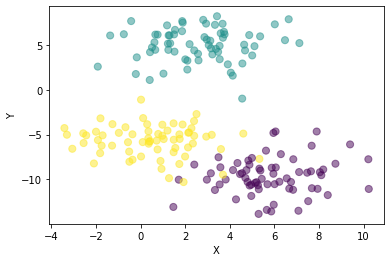

In [279]:
plot_2d_clustering(X,y)

Initialization complete
Iteration 0, inertia 2728.5950428348497
Iteration 1, inertia 1367.0186532243868
Iteration 2, inertia 1352.692239721998
Initialization complete
Iteration 0, inertia 1664.531868330191
Iteration 1, inertia 1351.2335639692249
Iteration 2, inertia 1350.8609016466467
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1670.7799816963711
Iteration 1, inertia 1353.9617123204778
Iteration 2, inertia 1351.111358964538
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1819.2468585304198
Iteration 1, inertia 1352.3040413464607
Iteration 2, inertia 1351.111358964538
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1838.8403179671384
Iteration 1, inertia 1357.1168701637923
Iteration 2, inertia 1352.525353306432
Initialization complete
Iteration 0, inertia 3991.323121596442
Iteration 1, inertia 1378.3893656878463
Iteration 2, inertia 1350.8609016466467
Conv

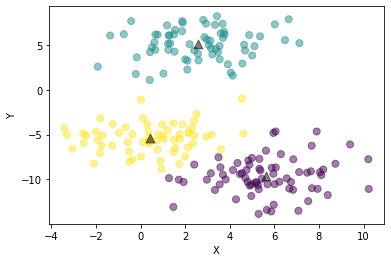

In [88]:
from sklearn.cluster import KMeans

centroids_init = np.array([[0,100],[0,1], [1,0]])

clustering = KMeans(n_clusters=3,
                    verbose=3, 
#                     init='random',
                    max_iter=3,
#                     init = centroids_init,
                    random_state=42)

# n_clusters:int, default=8 == numero de clusters/centróides
# init:{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’ == inicialização
# n_init:int, default=10 == numero de vezes de que o kmeans vai ser rodado com diferentes centróides
# max_iter:int, default=300 == número máximo de iterações
# tol:float, default=1e-4 == critério de parada - pela inercia - para declarar convergência
# precompute_distances:{‘auto’, True, False}, default=’auto’ == se computar a distância inicalmente (rapido mas usa memoria)
# verbose:int, default=0
# random_state:int, RandomState instance or None, default=None
# copy_x:bool, default=True
# n_jobs:int, default=None
# algorithm:{“auto”, “full”, “elkan”}, default=”auto”

clustering.fit(X)

print('Centroides:{}'.format(clustering.cluster_centers_))
print('Inertia:{}'.format(clustering.inertia_))
print('Iterações:{}'.format(clustering.n_iter_))

y_pred = clustering.labels_

plot_2d_clustering(X,y_pred,centroid=clustering.cluster_centers_)

In [582]:
# def plot_dendrogram(model, **kwargs):
#     # Create linkage matrix and then plot the dendrogram

#     # create the counts of samples under each node
#     counts = np.zeros(model.children_.shape[0])
#     n_samples = len(model.labels_)
#     for i, merge in enumerate(model.children_):
#         current_count = 0
#         for child_idx in merge:
#             if child_idx < n_samples:
#                 current_count += 1  # leaf node
#             else:
#                 current_count += counts[child_idx - n_samples]
#         counts[i] = current_count

#     linkage_matrix = np.column_stack([model.children_, model.distances_,
#                                       counts]).astype(float)

#     # Plot the corresponding dendrogram
#     dendrogram(linkage_matrix, **kwargs)
    
#     return linkage_matrix

In [579]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram

clustering = AgglomerativeClustering(n_clusters=5, affinity='l1', linkage='complete')#,distance_threshold=0)

# n_clusters:int or None, default=2 == número de clusters, pode ser não definida se definirmos a distance_thershold
# affinity:str or callable, default=’euclidean’; metrica usada para computar o linkage. Pode ser “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”
# memory:str or object with the joblib.Memory interface, default=None == 
# connectivity:array-like or callable, default=None == 
# compute_full_tree: ‘auto’ or bool, default=’auto’ == 
# linkage:{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’ == critério de linkage
# distance_threshold:float, default=None == distância máxima de que cluster são agrupados
# compute_distances:bool, default=False 

clustering.fit(X)

AgglomerativeClustering(affinity='l1', linkage='complete', n_clusters=5)

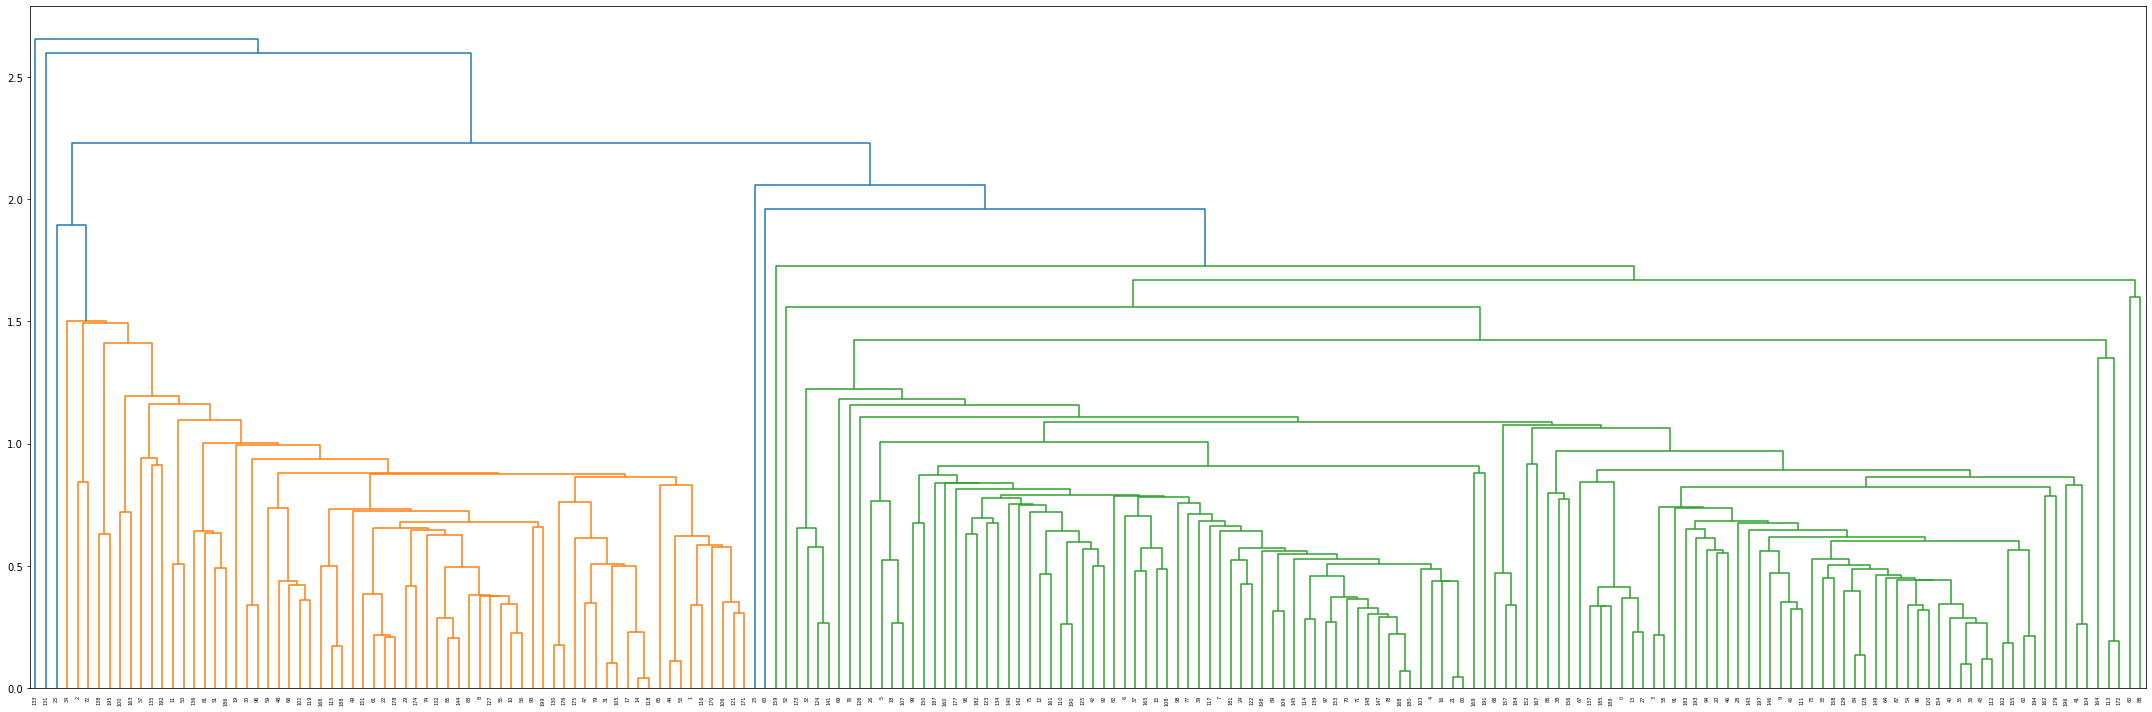

In [584]:
# clustering = AgglomerativeClustering(n_clusters=None,linkage='single',distance_threshold=0)
# plt.figure(figsize=(30,10))
# linkag_matrix = plot_dendrogram(clustering, truncate_mode='level', p=4)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.figure(figsize=(30,10))
dendongram = sch.dendrogram(sch.linkage(X, method='single'), p=4)
# plt.axhline(y=euc_dis(points[3],points[8]), color='r', linestyle='-')
plt.tight_layout()

In [ ]:
from sklearn.cluster import DBSCAN

clustering =  DBSCAN(eps =0.7, min_samples=4,metric='minkowski', p=2)

# eps:float, default=0.5 == epsilon - define o raio de busca
# min_samples:int, default=5 == minPoints para ser considerado core
# metric:string, or callable, default=’euclidean’ == metrica de distancia - exemplo: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
# metric_params:dict, default=None == argumento complementar a distancia
# algorithm:{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’ == maneira de partionar espaço
# leaf_size:int, default=30 == tamanho da folha se utilizado ‘ball_tree’ ou ‘kd_tree’
# p:float, default=None == se minkowski, qual a métrica de distancia
# n_jobs:int, default=None == numero de jobs em paralelo para o processamento

clustering.fit(X)

print('Número de Clusters:',len(np.unique(clustering.labels_))-1)

# indeces dos pontos core ou coordenada dos mesmos
clustering.core_sample_indices_
clustering.components_

# label dos pontos
y_pred = clustering.labels_

# Plotta o resultado
plot_2d_clustering(X,y_pred)

In [252]:
from sklearn.mixture import GaussianMixture

clustering = GaussianMixture(n_components=3,n_init=2,verbose=3, covariance_type='tied')

# n_components:int, default=1 == número de clusters
# covariance_type:{‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’ == tipo de covariância
# tol:float, default=1e-3 == threshold de convergência
# max_iter:int, default=100 == número de iterações do EM
# n_init:int, default=1 == número de inicializações
# init_params:{‘kmeans’, ‘random’}, default=’kmeans’ == inicialização, podendos er kmeans ou outro
# random_state:int, RandomState instance or None, default=None
# verbose:int, default=0

clustering.fit(X)

# compontent pi de cada mistura
clustering.weights_

# "centroide" - media de cada componente
clustering.means_

# Covariâncias (matriz covariância de cada mistura)
clustering.covariances_

# Proba de softclustering
y_pred = clustering.predict_proba(X)

Initialization 0
Initialization converged: True	 time lapse 1.46312s	 ll -5.11573
Initialization 1
Initialization converged: True	 time lapse 0.00328s	 ll -5.11572


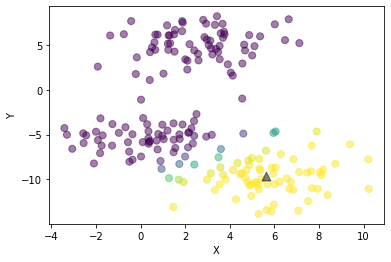

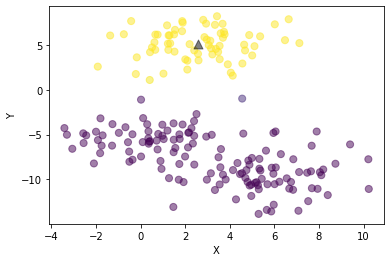

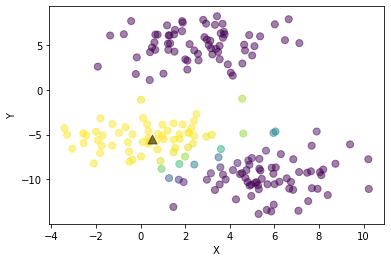

In [253]:
for mixture in range(y_pred.shape[1]):
    plot_2d_clustering(X,y_pred[:,mixture],list([clustering.means_[mixture]]))
    plt.show()

# Metricas de Clustering

In [92]:
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score
from sklearn.metrics import rand_score,adjusted_rand_score,homogeneity_score,completeness_score
from sklearn.metrics import v_measure_score,adjusted_mutual_info_score

y_true=y

# Indices externos
homogeneity_score = homogeneity_score(y_true, clustering.labels_)
completeness_score = completeness_score(y_true, clustering.labels_)
v_measure_score =  v_measure_score(y_true, clustering.labels_)
adjusted_rand_score = adjusted_rand_score(y_true, clustering.labels_)
adjusted_mutual_info_score = adjusted_mutual_info_score(y_true,  clustering.labels_)

# Indices internos
inertia = clustering.inertia_ # somente para kmeans
silhouette_score = silhouette_score(X, clustering.labels_,metric='euclidean')
calinski_harabasz_score = calinski_harabasz_score(X, clustering.labels_)
davies_bouldin_score = davies_bouldin_score(X, clustering.labels_)

In [598]:
def bench_clustering(estimator, X, y_true=None):
    estimator.fit(X)
    
    scores={}
    
    # A short explanation for every score:
    # homogeneity:          each cluster contains only members of a single class (range 0 - 1)
    # completeness:         all members of a given class are assigned to the same cluster (range 0 - 1)
    # v_measure:            harmonic mean of homogeneity and completeness
    # adjusted_rand:        similarity of the actual values and their predictions,
    #                       ignoring permutations and with chance normalization
    #                       (range -1 to 1, -1 being bad, 1 being perfect and 0 being random)
    # adjusted_mutual_info: agreement of the actual values and predictions, ignoring permutations
    #                       (range 0 - 1, with 0 being random agreement and 1 being perfect agreement)
    # silhouette:           uses the mean distance between a sample and all other points in the same class,
    #                       as well as the mean distance between a sample and all other points in the nearest cluster
    #                       to calculate a score (range: -1 to 1, with the former being incorrect,
    #                       and the latter standing for highly dense clustering.
    #                       0 indicates overlapping clusters
    
    if y_true is not None:
        scores['homogeneity_score'] = homogeneity_score(y_true, estimator.labels_)
        scores['completeness_score'] = completeness_score(y_true, estimator.labels_)
        scores['v_measure_score'] =  v_measure_score(y_true, estimator.labels_)
        scores['adjusted_rand_score'] = adjusted_rand_score(y_true, estimator.labels_)
        scores['adjusted_mutual_info_score'] = adjusted_mutual_info_score(y_true,  estimator.labels_)
        
    scores['inertia'] = clustering.inertia_
    scores['silhouette_score'] = silhouette_score(X, estimator.labels_,metric='euclidean')
    scores['calinski_harabasz_score'] = calinski_harabasz_score(X, estimator.labels_)
    scores['davies_bouldin_score'] = davies_bouldin_score(X, estimator.labels_)

    
    return scores
    
bench_clustering(clustering, X, y)

Initialization complete
Iteration 0, inertia 2728.5950428348497
Iteration 1, inertia 1367.0186532243868
Iteration 2, inertia 1352.692239721998
Initialization complete
Iteration 0, inertia 1664.531868330191
Iteration 1, inertia 1351.2335639692249
Iteration 2, inertia 1350.8609016466467
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1670.7799816963711
Iteration 1, inertia 1353.9617123204778
Iteration 2, inertia 1351.111358964538
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1819.2468585304198
Iteration 1, inertia 1352.3040413464607
Iteration 2, inertia 1351.111358964538
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1838.8403179671384
Iteration 1, inertia 1357.1168701637923
Iteration 2, inertia 1352.525353306432
Initialization complete
Iteration 0, inertia 3991.323121596442
Iteration 1, inertia 1378.3893656878463
Iteration 2, inertia 1350.8609016466467
Conv

{'homogeneity_score': 0.9065807277572955,
 'completeness_score': 0.907567729588748,
 'v_measure_score': 0.9070739601799414,
 'adjusted_rand_score': 0.926861566207318,
 'adjusted_mutual_info_score': 0.9062080163274678,
 'inertia': 1350.8609016466467,
 'silhouette_score': 0.5815214844418355,
 'calinski_harabasz_score': 634.229087828917,
 'davies_bouldin_score': 0.5903456175115358}

# Grid Search Simples


In [120]:
from sklearn.model_selection import GridSearchCV

# Define modelo base
basemodel = GradientBoostingRegressor()

# Grid de parâmetros    
param_grid = {}
param_grid['n_estimators'] = [10, 50]#, 100, 500]
param_grid['learning_rate'] = [0.001, 0.01]#, 0.1, 1.0]
param_grid['subsample'] = [0.5, 0.7, 1.0]
param_grid['min_samples_leaf'] = [0.05, 0.1]#,0.2,1]
param_grid['max_depth'] = [3, 7, 9, 15]
param_grid['random_state'] = [42]

# Define o grid search
gridsearch = GridSearchCV(basemodel,
                          param_grid,
                          cv=3,
#                           scoring=['roc_auc', 'accuracy', 'f1', 'recall'],
                          scoring=['r2', 'neg_mean_squared_error','neg_mean_absolute_error'],
                          return_train_score=True,
                          refit= 'r2',
#                           refit= 'roc_auc',
                          verbose=3)
    
# fit model to data
gridsearch.fit(X, y.values.ravel())
    
# Devolve o melhor modelo
best_model = gridsearch.best_estimator_

# Fita melhor modelo no treino
# best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)

y_pred_test = best_model.predict(X_test)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 1/3] END learning_rate=0.001, max_depth=3, min_samples_leaf=0.05, n_estimators=10, random_state=42, subsample=0.5; neg_mean_absolute_error: (train=-67.063, test=-63.078) neg_mean_squared_error: (train=-5968.810, test=-5709.542) r2: (train=0.009, test=0.001) total time=   0.0s
[CV 2/3] END learning_rate=0.001, max_depth=3, min_samples_leaf=0.05, n_estimators=10, random_state=42, subsample=0.5; neg_mean_absolute_error: (train=-63.964, test=-68.502) neg_mean_squared_error: (train=-5670.636, test=-6291.366) r2: (train=0.009, test=0.008) total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_depth=3, min_samples_leaf=0.05, n_estimators=10, random_state=42, subsample=0.5; neg_mean_absolute_error: (train=-65.286, test=-65.185) neg_mean_squared_error: (train=-5973.623, test=-5679.155) r2: (train=0.010, test=0.003) total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_depth=3, min_samples_leaf=0.05, n_estimators=10, random_s

[CV 3/3] END learning_rate=0.001, max_depth=3, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.7; neg_mean_absolute_error: (train=-64.147, test=-64.123) neg_mean_squared_error: (train=-5760.398, test=-5498.970) r2: (train=0.045, test=0.035) total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_depth=3, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=1.0; neg_mean_absolute_error: (train=-65.788, test=-61.958) neg_mean_squared_error: (train=-5730.741, test=-5492.765) r2: (train=0.049, test=0.039) total time=   0.0s
[CV 2/3] END learning_rate=0.001, max_depth=3, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=1.0; neg_mean_absolute_error: (train=-62.870, test=-67.598) neg_mean_squared_error: (train=-5473.871, test=-6112.208) r2: (train=0.044, test=0.037) total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_depth=3, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=1.0; neg_mean_absolute_error: (train=-64.049, t

[CV 1/3] END learning_rate=0.001, max_depth=7, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=1.0; neg_mean_absolute_error: (train=-65.756, test=-61.985) neg_mean_squared_error: (train=-5724.370, test=-5497.918) r2: (train=0.050, test=0.038) total time=   0.0s
[CV 2/3] END learning_rate=0.001, max_depth=7, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=1.0; neg_mean_absolute_error: (train=-62.833, test=-67.557) neg_mean_squared_error: (train=-5463.851, test=-6099.636) r2: (train=0.045, test=0.039) total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_depth=7, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=1.0; neg_mean_absolute_error: (train=-64.014, test=-64.006) neg_mean_squared_error: (train=-5732.766, test=-5485.873) r2: (train=0.050, test=0.037) total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_depth=9, min_samples_leaf=0.05, n_estimators=10, random_state=42, subsample=0.5; neg_mean_absolute_error: (train=-67.059, 

[CV 2/3] END learning_rate=0.001, max_depth=9, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.5; neg_mean_absolute_error: (train=-63.047, test=-67.598) neg_mean_squared_error: (train=-5509.400, test=-6113.461) r2: (train=0.037, test=0.036) total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_depth=9, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.5; neg_mean_absolute_error: (train=-64.334, test=-64.272) neg_mean_squared_error: (train=-5792.774, test=-5522.574) r2: (train=0.040, test=0.031) total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_depth=9, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.7; neg_mean_absolute_error: (train=-65.935, test=-62.131) neg_mean_squared_error: (train=-5763.247, test=-5536.540) r2: (train=0.043, test=0.032) total time=   0.0s
[CV 2/3] END learning_rate=0.001, max_depth=9, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.7; neg_mean_absolute_error: (train=-62.926, t

[CV 2/3] END learning_rate=0.001, max_depth=15, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.7; neg_mean_absolute_error: (train=-62.926, test=-67.508) neg_mean_squared_error: (train=-5485.786, test=-6096.923) r2: (train=0.041, test=0.039) total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_depth=15, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.7; neg_mean_absolute_error: (train=-64.139, test=-64.124) neg_mean_squared_error: (train=-5759.296, test=-5499.148) r2: (train=0.046, test=0.035) total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_depth=15, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=1.0; neg_mean_absolute_error: (train=-65.756, test=-61.985) neg_mean_squared_error: (train=-5724.370, test=-5497.918) r2: (train=0.050, test=0.038) total time=   0.0s
[CV 2/3] END learning_rate=0.001, max_depth=15, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=1.0; neg_mean_absolute_error: (train=-62.83

[CV 2/3] END learning_rate=0.01, max_depth=3, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.5; neg_mean_absolute_error: (train=-54.639, test=-59.615) neg_mean_squared_error: (train=-4175.352, test=-4673.418) r2: (train=0.270, test=0.263) total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=3, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.5; neg_mean_absolute_error: (train=-55.779, test=-56.263) neg_mean_squared_error: (train=-4319.504, test=-4288.352) r2: (train=0.284, test=0.247) total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_depth=3, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.7; neg_mean_absolute_error: (train=-56.135, test=-54.277) neg_mean_squared_error: (train=-4162.065, test=-4244.296) r2: (train=0.309, test=0.258) total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=3, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.7; neg_mean_absolute_error: (train=-53.666, test=

[CV 3/3] END learning_rate=0.01, max_depth=7, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.7; neg_mean_absolute_error: (train=-54.311, test=-55.183) neg_mean_squared_error: (train=-4112.444, test=-4156.015) r2: (train=0.319, test=0.270) total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_depth=7, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=1.0; neg_mean_absolute_error: (train=-54.852, test=-53.498) neg_mean_squared_error: (train=-3961.074, test=-4097.877) r2: (train=0.342, test=0.283) total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=7, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=1.0; neg_mean_absolute_error: (train=-53.209, test=-58.943) neg_mean_squared_error: (train=-3919.299, test=-4620.615) r2: (train=0.315, test=0.272) total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=7, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=1.0; neg_mean_absolute_error: (train=-53.446, test=

[CV 1/3] END learning_rate=0.01, max_depth=9, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.5; neg_mean_absolute_error: (train=-57.134, test=-54.559) neg_mean_squared_error: (train=-4326.882, test=-4301.582) r2: (train=0.282, test=0.248) total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=9, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.5; neg_mean_absolute_error: (train=-54.639, test=-59.615) neg_mean_squared_error: (train=-4175.352, test=-4673.418) r2: (train=0.270, test=0.263) total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=9, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.5; neg_mean_absolute_error: (train=-55.779, test=-56.263) neg_mean_squared_error: (train=-4319.504, test=-4288.352) r2: (train=0.284, test=0.247) total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_depth=9, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.7; neg_mean_absolute_error: (train=-56.097, test=

[CV 1/3] END learning_rate=0.01, max_depth=15, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.7; neg_mean_absolute_error: (train=-56.097, test=-54.250) neg_mean_squared_error: (train=-4157.886, test=-4241.936) r2: (train=0.310, test=0.258) total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=15, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.7; neg_mean_absolute_error: (train=-53.635, test=-58.925) neg_mean_squared_error: (train=-4011.658, test=-4584.963) r2: (train=0.299, test=0.277) total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=15, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=0.7; neg_mean_absolute_error: (train=-54.311, test=-55.183) neg_mean_squared_error: (train=-4112.444, test=-4156.015) r2: (train=0.319, test=0.270) total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_depth=15, min_samples_leaf=0.1, n_estimators=50, random_state=42, subsample=1.0; neg_mean_absolute_error: (train=-54.852, t

In [130]:
cv_df = pd.DataFrame(gridsearch.cv_results_)

In [132]:
cv_df.sort_values('rank_test_r2')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_n_estimators,param_random_state,param_subsample,...,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_train_neg_mean_absolute_error,split1_train_neg_mean_absolute_error,split2_train_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error
64,0.029588,0.000470,0.002327,4.707523e-04,0.01,7,0.05,50,42,0.7,...,-58.089369,-54.191273,-55.275360,2.007197,1,-53.893741,-51.320764,-52.356483,-52.523663,1.057044
76,0.029255,0.000470,0.001663,4.702464e-04,0.01,9,0.05,50,42,0.7,...,-58.089369,-54.191273,-55.275360,2.007197,1,-53.893741,-51.320764,-52.356483,-52.523663,1.057044
88,0.030581,0.000467,0.001995,8.147828e-04,0.01,15,0.05,50,42,0.7,...,-58.089369,-54.191273,-55.275360,2.007197,1,-53.893741,-51.320764,-52.356483,-52.523663,1.057044
87,0.024269,0.000470,0.002327,4.701341e-04,0.01,15,0.05,50,42,0.5,...,-58.453199,-54.531085,-55.517688,2.112570,7,-55.241353,-52.466714,-53.431072,-53.713047,1.150156
75,0.024933,0.000814,0.001662,4.701340e-04,0.01,9,0.05,50,42,0.5,...,-58.453199,-54.531085,-55.517688,2.112570,7,-55.241353,-52.466714,-53.431072,-53.713047,1.150156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,0.006317,0.000470,0.001995,1.946680e-07,0.001,9,0.1,10,42,0.7,...,-68.513173,-65.209931,-65.604093,2.231809,90,-67.072627,-63.990420,-65.307847,-65.456965,1.262716
42,0.006648,0.000469,0.001330,4.703588e-04,0.001,15,0.1,10,42,0.5,...,-68.530332,-65.249704,-65.627729,2.231704,93,-67.108190,-64.010975,-65.348562,-65.489242,1.268340
6,0.005326,0.000476,0.002010,9.765142e-06,0.001,3,0.1,10,42,0.5,...,-68.530332,-65.249704,-65.627729,2.231704,93,-67.108190,-64.010975,-65.348562,-65.489242,1.268340
18,0.007396,0.001158,0.002004,1.163294e-05,0.001,7,0.1,10,42,0.5,...,-68.530332,-65.249704,-65.627729,2.231704,93,-67.108190,-64.010975,-65.348562,-65.489242,1.268340


# Teste de Queries SQL

In [299]:
import sqlite3
import pandasql as ps
import random

In [320]:
data={}

data['COLUNA_0'] = [str(x) for x in np.random.randint(0,5,100)]
data['COLUNA_1'] = [str(x) for x in np.random.randint(100,300,100)]
data['COLUNA_2'] = np.random.randint(1000,3000,100)
data['COLUNA_3'] = [round(random.uniform(1000, 10000),2) for x in range(100)]

In [321]:
df_1 = pd.DataFrame(data)

In [322]:
df_1.head()

,COLUNA_0,COLUNA_1,COLUNA_2,COLUNA_3
0,0,282,2510,6362.35
1,3,199,1789,2340.87
2,0,286,2228,1565.58
3,3,103,2772,4047.90
4,1,240,1872,1538.39


In [343]:
# QUERY 1
df_1.query('COLUNA_2>2000')

,COLUNA_0,COLUNA_1,COLUNA_2,COLUNA_3
0,0,282,2510,6362.35
2,0,286,2228,1565.58
3,3,103,2772,4047.90
5,1,116,2411,2776.82
6,0,210,2721,4430.54
...,...,...,...,...
94,3,141,2117,3344.26
95,3,209,2765,9618.10
96,2,281,2786,3057.50
98,0,258,2776,2947.57


In [344]:
q1 = 'SELECT * FROM df_1 where COLUNA_2>2000'
ps.sqldf(q1,locals())

,COLUNA_0,COLUNA_1,COLUNA_2,COLUNA_3
0,0,282,2510,6362.35
1,0,286,2228,1565.58
2,3,103,2772,4047.90
3,1,116,2411,2776.82
4,0,210,2721,4430.54
...,...,...,...,...
57,3,141,2117,3344.26
58,3,209,2765,9618.10
59,2,281,2786,3057.50
60,0,258,2776,2947.57


In [351]:
# QUERY 2
(df_1.query('COLUNA_2>1500')[['COLUNA_0', 'COLUNA_3']]
 .groupby('COLUNA_0').mean().reset_index().rename(columns={'COLUNA_3':'media_3'}))

,COLUNA_0,media_3
0,0,6059.159286
1,1,5409.610556
2,2,4770.717778
3,3,4680.221333
4,4,6763.012778


In [336]:
q2 = '''select
        COLUNA_0,
        avg(COLUNA_3) as media_3
        from df_1
        where COLUNA_2>1500
        group by COLUNA_0'''
ps.sqldf(q2,locals())

,COLUNA_0,media_3
0,0,6059.159286
1,1,5409.610556
2,2,4770.717778
3,3,4680.221333
4,4,6763.012778


In [354]:
# QUERY 3
(df_1.query('COLUNA_2>1500')[['COLUNA_0', 'COLUNA_3']]
 .groupby('COLUNA_0').mean().reset_index().rename(columns={'COLUNA_3':'media_3'})
 .sort_values(by='media_3',ascending=False).head(3))

,COLUNA_0,media_3
4,4,6763.012778
0,0,6059.159286
1,1,5409.610556


In [356]:
q3 = '''select * from (select
        COLUNA_0,
        avg(COLUNA_3) as media_3
        from df_1
        where COLUNA_2>1500
        group by COLUNA_0) order by media_3 desc limit 3'''
ps.sqldf(q2,locals())

,COLUNA_0,media_3
0,4,6763.012778
1,0,6059.159286
2,1,5409.610556


In [ ]:
# query 4

In [363]:
q4 = '''SELECT 
        *, 
        ROW_NUMBER() OVER(PARTITION BY COLUNA_0 ORDER BY COLUNA_3 DESC) AS rank 
        FROM df_1'''
ps.sqldf(q4,locals())

,COLUNA_0,COLUNA_1,COLUNA_2,COLUNA_3,rank
0,0,168,2158,9636.30,1
1,0,188,2867,9415.68,2
2,0,131,1946,7693.09,3
3,0,100,1920,7552.11,4
4,0,268,1988,7439.21,5
...,...,...,...,...,...
95,4,253,1629,4643.00,17
96,4,295,2385,3243.04,18
97,4,207,1303,3169.85,19
98,4,134,2645,2121.55,20


In [364]:
# query 5
q5 = '''WITH SOURCE AS 
        (SELECT *, 
        ROW_NUMBER() OVER(PARTITION BY COLUNA_0 ORDER BY COLUNA_3 DESC) AS rank 
        FROM df_1) 
        SELECT * 
        FROM SOURCE 
        WHERE rank IN (1,2)'''
ps.sqldf(q5,locals())

,COLUNA_0,COLUNA_1,COLUNA_2,COLUNA_3,rank
0,0,168,2158,9636.30,1
1,0,188,2867,9415.68,2
2,1,263,1775,9847.92,1
3,1,286,1112,9612.40,2
4,2,247,1327,8818.66,1
5,2,258,2282,7957.22,2
6,3,267,2069,9818.44,1
7,3,209,2765,9618.10,2
8,4,143,2437,9866.46,1
9,4,285,2901,9060.64,2


In [370]:
# query 6

q6 = '''SELECT COLUNA_0, 
       AVG(COLUNA_3) OVER(PARTITION BY COLUNA_0) AS C_3_MEDIA, 
       MIN(COLUNA_3) OVER(PARTITION BY COLUNA_0) AS C_3_MIN, 
       SUM(COLUNA_3) OVER(PARTITION BY COLUNA_0) C_3_SUM
       FROM df_1'''
ps.sqldf(q6,locals())

,COLUNA_0,C_3_MEDIA,C_3_MIN,C_3_SUM
0,0,5960.916000,1565.58,89413.74
1,0,5960.916000,1565.58,89413.74
2,0,5960.916000,1565.58,89413.74
3,0,5960.916000,1565.58,89413.74
4,0,5960.916000,1565.58,89413.74
...,...,...,...,...
95,4,6351.247143,1956.87,133376.19
96,4,6351.247143,1956.87,133376.19
97,4,6351.247143,1956.87,133376.19
98,4,6351.247143,1956.87,133376.19
